In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
from chp6_util import *

考虑课本的例子，问题是
$$\text{minimize}\ f(x) = - \sum_{i=1}^{n} \log(x_i)$$
其中约束条件是
$$A x = b$$

**为使用如下代码，请同时下载chp6_util.py，并放在该文件同一个目录下。**

In [2]:
np.random.seed(1)

n = 500
p = 100
A = np.random.rand(p, n)
assert np.linalg.matrix_rank(A) == p, "Not full rank"
x0 = np.random.rand(n)
b = A @ x0

### 先使用cvxpy来求解

In [3]:
cp_x = cp.Variable(n)
constraints = [A @ cp_x == b]
obj = cp.Minimize(-cp.sum(cp.log(cp_x)))
prob = cp.Problem(obj, constraints)
prob.solve()
print("status:", prob.status)
print("optimal value = {:.4f}".format(prob.value))

status: optimal
optimal value = 351.0778


### 使用等式约束的牛顿法

Optimal value = 351.0778


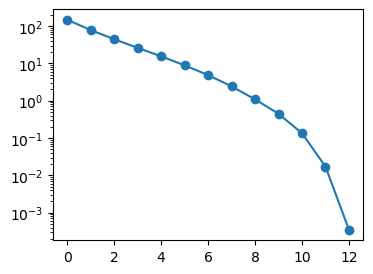

In [4]:
alpha = 0.1
beta = 0.5
tol = 1.0e-7

def f(x):
    return -np.sum(np.log(x))

def df(x):
    return -1/x

def hess(x):
    return np.diag(1/x**2)

prob = EqualityConstrainedProblem(f, df, hess, A, b)

final_x_ln, x_list_ln = prob.newton_with_linear_constraint(x0, alpha, beta, tol)

p_star_ln = f(final_x_ln)
print("Optimal value = {:.4f}".format(p_star_ln))

plt.figure(figsize=(4,3))
plt.plot([f(item) - p_star_ln for item in x_list_ln[:-2]], 'o-')
plt.yscale('log')

### 使用不可行初始点牛顿法

Optimal value = 351.0778


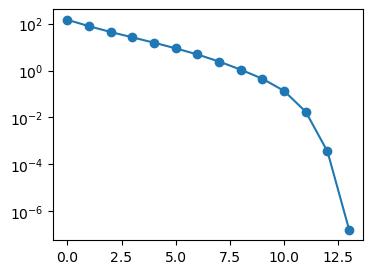

In [5]:
nu0 = np.random.randn(p)
final_x_pd, x_list_pd, final_nu_pd, nu_list_pd = prob.newton_with_infeasible_start(x0, nu0, alpha, beta, tol)

p_star_pd = f(final_x_pd)
print("Optimal value = {:.4f}".format(p_star_pd))

plt.figure(figsize=(4,3))
plt.plot([f(item) - p_star_pd for item in x_list_pd[:-2]], 'o-')
plt.yscale('log')

In [6]:
print("Compare cvxpy and newton (with linear constraints)")
print("Relative error of optimal x = {:.1E}\n".format(np.linalg.norm(final_x_ln - cp_x.value)/np.linalg.norm(cp_x.value)))

print("Compare cvxpy and newton (with infeasible start)")
print("Relative error of optimal x = {:.1E}\n".format(np.linalg.norm(final_x_pd - cp_x.value)/np.linalg.norm(cp_x.value)))

Compare cvxpy and newton (with linear constraints)
Relative error of optimal x = 2.5E-06

Compare cvxpy and newton (with infeasible start)
Relative error of optimal x = 2.5E-06

